In [1]:
import cv2
import copy
import numpy as np
I = cv2.imread("test_noisy.jpg",0)
y = copy.copy(I)
alpha = 0.1
gamma = 4
m,n = I.shape
S = np.zeros((m,n))
SF = np.zeros((m,n))
beta = np.zeros((m,n))
for count in range(5):
    for i in range(m):
        for j in range(n):
            for k in range(i-1, i+2):
                for l in range(j-1, j+2):
                    if k>0 and l>0 and k<m and l<n:
                        S[i][j] = S[i][j] + 1/(1 + (np.sqrt((k-i)**2 + (l-j)**2 + (y[i][j]-y[k][l])**2 ).astype(float))**gamma)
            
            beta[i][j] = alpha/(S[i][j]-1)
            for k in range(i-1, i+2):
                for l in range(j-1, j+2):
                    if k>0 and l>0 and k<=m-1 and l<=n-1:
                        SF[i][j] = SF[i][j] + (y[k][l]/(1 + (np.sqrt((k-i)**2 + (l-j)**2 + (y[i][j]-y[k][l])**2 ).astype(float))**gamma))
            SF[i][j] = SF[i][j] - y[i][j]
            y[i][j] = (1-alpha)*y[i][j] + beta[i][j] * SF[i][j]

/home/abhishek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
/home/abhishek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in ubyte_scalars


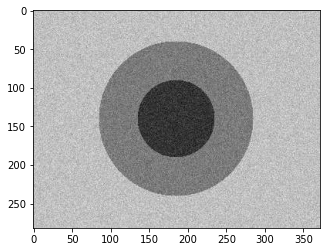

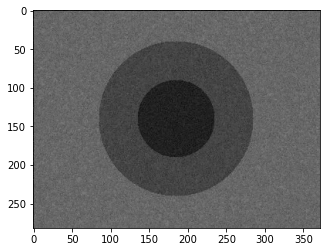

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(I, cmap="gray")
plt.figure()
plt.imshow(y, cmap="gray")